# Problem Set 1

#### Aaron Desrochers

##### Due Friday September 16th at 11:59pm

### Problem 1:

<div>
<img src="problems/p1.png" width="800">
</div>

I forgot that I skipped over this question initially, and I'm only realizing now, right before I need to hand in the assignment. Oops (:

### Problem 2:

<div>
<img src="problems/p2.png" width="800">
</div>

In [20]:
import numpy as np
#from scipy.misc import derivative


def ndiff(fun, x, full=False):
    #Find dx
    Em = 1e-16 #machine error for double precision machines
    Ef = Em #for simple functions, the fractional accuracy is 
            #comparable to the machine accuracy
    dx = Ef**(1/3)*x
    
    #Calculate the symmetric derivative
    
    df = (fun(x+dx)-fun(x-dx))/(2*dx)
    
    #estimate error
    
    error = Ef**(2/3)
    
    if full==False:
        return df
    
    elif full==True:
        return [df, dx, error]
    
    else:
        print("full must be either True or False")

Clarification:
dx:
The equation for dx ($\epsilon_f^{\frac{1}{3}}x$) comes from the fact that we want to find a dx that minimizes the sum of the truncation error and the roundoff error. We have equations for the truncation error: $e_t \approx dx^2f'''$, and roundoff error: $e_r \approx \epsilon_f |\frac{f}{dx}|$, so by minimizing the sum of these two errors, we come to the equation for dx:
$dx \approx (\frac{\epsilon_f f}{f'''})^{\frac{1}{3}}$, which is approximately equal to $\epsilon_f^{\frac{1}{3}}x$.

error:
To calculate the error, we again need the truncation errorr and the roundoff error. The equation for the error is written as: $\frac{(e_r+e_t)}{|f'|}$, which then, by plugging in values for $e_r$ and $e_t$ becomes $(\epsilon_f)^{\frac{2}{3}}f^{\frac{2}{3}}(f''')^{\frac{1}{3}}/f'$, which approximates to $\epsilon_f^{\frac{2}{3}}$.

### Problem 3:

<div>
<img src="problems/p3.png" width="800">
</div>

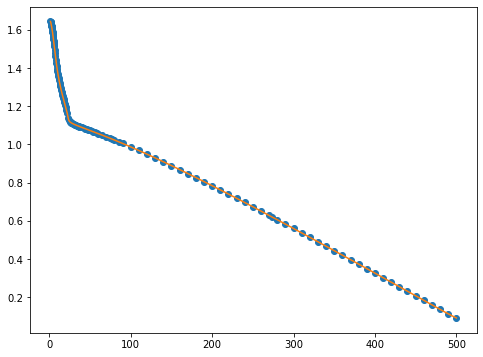

In [64]:
#Looking at the data
import numpy as np
import matplotlib.pyplot as plt
from scipy import interpolate

data = np.loadtxt('lakeshore.txt')

temp = data[:,0]
voltage = data[:,1]

x = np.linspace(min(temp), max(temp), 1000)

spline = interpolate.splrep(temp, voltage)
y = interpolate.splev(x, spline)

plt.figure(figsize=(8,6))
plt.plot(temp, voltage, 'o')
plt.plot(x, y)
plt.show()

In [21]:
#coding the function
import numpy as np
import matplotlib.pyplot as plt
from scipy import interpolate

def lakeshore(V, data):
    #separate temp and voltage data
    t = data[:,0]
    v = data[:,1]
    #create the spline from our data
    spline = interpolate.splrep(t, v)
    #find the temp of the input voltage
    temp = interpolate.splev(V, spline)
    
    return temp

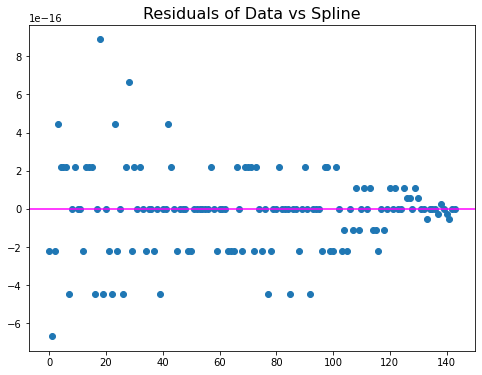

2.1316316525753148e-16


In [3]:
#Roughly estimating the data
data = np.loadtxt('lakeshore.txt')

temp = data[:,0]
voltage = data[:,1]

x = np.linspace(min(temp), max(temp), 1000)

spline = interpolate.splrep(temp, voltage)
y = interpolate.splev(x, spline)

err = np.zeros(len(temp))

for i in range(len(temp)):
    err[i]=voltage[i]-interpolate.splev(temp[i], spline)
    
plt.figure(figsize=(8,6))
plt.title('Residuals of Data vs Spline', fontsize=16)
plt.plot(err, 'o')
plt.axhline(0, color='magenta')
plt.show()

print(np.std(err))

To estimate the error, the residuals of the cubic spline with the data points were computed and can be seen to be on the order of $10^{-16}$, which is on the same order as the limit of our computer. Another thing to consider is that the measured values of voltage are only accurate up to $10^{-6}$, and the overall error can't be lower than the error on the measurement itself. Taking this into account, the error on the interpolation is around $10^{-6}$.

### Problem 4:

<div>
<img src="problems/p4.png" width="800">
</div>

#### Cosine

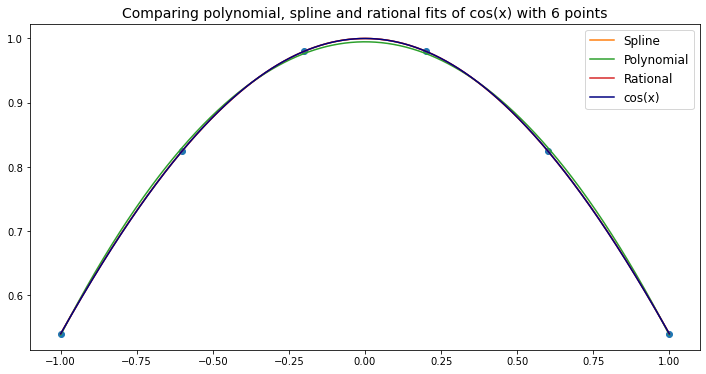

Error in polynomial fit:  0.004047370486308816
Error in cubic spline:  0.00027611698951646776
Error in rational fit:  5.86253595415372e-05


In [23]:
#Function
n=3 #numerator & denominator order for rational fit
m=2 

func=np.cos

x = np.linspace(-1,1,n+m+1)
y = func(x)

xx = np.linspace(-1, 1, 1001)

#Poly
y_poly=np.zeros(len(xx))

for i, myx in enumerate(xx):
    pp=np.polyfit(x, y, 3)
    y_poly[i]=np.polyval(pp,myx)

#Spline
spline = interpolate.splrep(x, y)
y_spline = interpolate.splev(xx, spline)

#Rational
pcols=[x**k for k in range(n+1)]
pmat=np.vstack(pcols)

qcols=[-x**k*y for k in range(1,m+1)]
qmat=np.vstack(qcols)
mat=np.hstack([pmat.T,qmat.T])
coeffs=np.linalg.inv(mat)@y

p=0
for i in range(n+1):
    p=p+coeffs[i]*xx**i
qq=1
for i in range(m):
    qq=qq+coeffs[n+1+i]*xx**(i+1)

y_rat=p/qq


plt.figure(figsize=(12,6))
plt.title('Comparing polynomial, spline and rational fits of cos(x) with {} points'.format(n+m+1), fontsize=14)
plt.plot(x,y, 'o')
plt.plot(xx, y_spline, label='Spline')
plt.plot(xx, y_poly, label='Polynomial')
plt.plot(xx, y_rat, label='Rational')
plt.plot(xx, func(xx), label='cos(x)', color='navy')
plt.legend(fontsize=12)
plt.show()

print('Error in polynomial fit: ',np.std(y_poly-func(xx)))
print('Error in cubic spline: ',np.std(y_spline-func(xx)))
print('Error in rational fit: ',np.std(y_rat-func(xx)))

As we can see from the error on each fit, the accuracy increases as we go from a polynomial fit to a cubic spline, then increases again as we go to a rational fit.

#### Lorentz

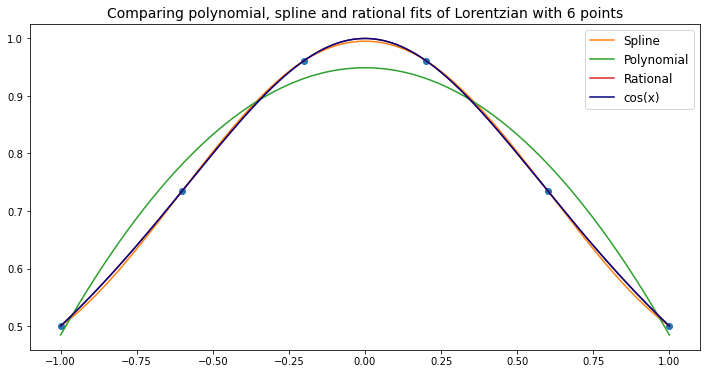

Error in polynomial fit:  0.034338085497428145
Error in cubic spline:  0.0038300363626882373
Error in rational fit:  7.780468787861449e-16


In [13]:
#Function
n=3 #numerator & denominator order for rational fit
m=2 

def func(x):
    return 1/(1+x**2)

x = np.linspace(-1,1,n+m+1)
y = func(x)

xx = np.linspace(-1, 1, 1001)

#Poly
y_poly=np.zeros(len(xx))

for i, myx in enumerate(xx):
    pp=np.polyfit(x, y, 3)
    y_poly[i]=np.polyval(pp,myx)

#Spline
spline = interpolate.splrep(x, y)
y_spline = interpolate.splev(xx, spline)

#Rational
pcols=[x**k for k in range(n+1)]
pmat=np.vstack(pcols)

qcols=[-x**k*y for k in range(1,m+1)]
qmat=np.vstack(qcols)
mat=np.hstack([pmat.T,qmat.T])
coeffs=np.linalg.inv(mat)@y

p=0
for i in range(n+1):
    p=p+coeffs[i]*xx**i
qq=1
for i in range(m):
    qq=qq+coeffs[n+1+i]*xx**(i+1)

y_rat=p/qq


plt.figure(figsize=(12,6))
plt.title('Comparing polynomial, spline and rational fits of Lorentzian with {} points'.format(n+m+1), fontsize=14)
plt.plot(x,y, 'o')
plt.plot(xx, y_spline, label='Spline')
plt.plot(xx, y_poly, label='Polynomial')
plt.plot(xx, y_rat, label='Rational')
plt.plot(xx, func(xx), label='cos(x)', color='navy')
plt.legend(fontsize=12)
plt.show()

print('Error in polynomial fit: ',np.std(y_poly-func(xx)))
print('Error in cubic spline: ',np.std(y_spline-func(xx)))
print('Error in rational fit: ',np.std(y_rat-func(xx)))

The error we should expect to see on the Lorentzian with the rational function fit is 0, since the Lorentzian itself IS a rational function. What we actually get is error on the order of $10^{-16}$, which is caused by the limits of the computer.

#### Trying with new numerator/denominator

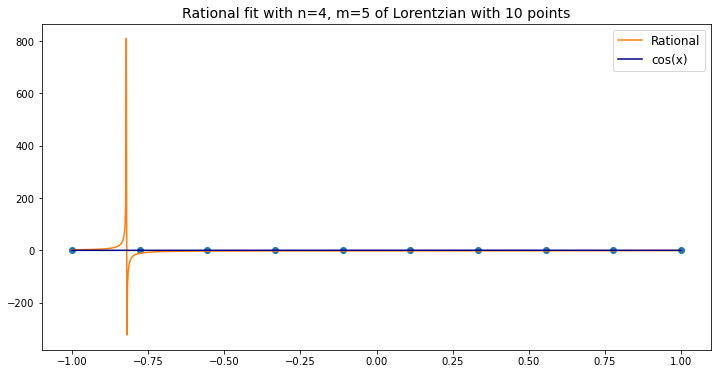

Error in rational fit:  29.365272059433355


In [15]:
#Function
n=4 #numerator & denominator order for rational fit
m=5 

def func(x):
    return 1/(1+x**2)

x = np.linspace(-1,1,n+m+1)
y = func(x)

xx = np.linspace(-1, 1, 1001)

#Rational
pcols=[x**k for k in range(n+1)]
pmat=np.vstack(pcols)

qcols=[-x**k*y for k in range(1,m+1)]
qmat=np.vstack(qcols)
mat=np.hstack([pmat.T,qmat.T])
coeffs=np.linalg.inv(mat)@y

p=0
for i in range(n+1):
    p=p+coeffs[i]*xx**i
qq=1
for i in range(m):
    qq=qq+coeffs[n+1+i]*xx**(i+1)

y_rat=p/qq


plt.figure(figsize=(12,6))
plt.title('Rational fit with n=4, m=5 of Lorentzian with {} points'.format(n+m+1), fontsize=14)
plt.plot(x,y, 'o')
plt.plot(xx, y_rat, label='Rational')
plt.plot(xx, func(xx), label='cos(x)', color='navy')
plt.legend(fontsize=12)
plt.show()

print('Error in rational fit: ',np.std(y_rat-func(xx)))

Now that we changed the order of our numerator and denominator, the rational fit is messing up. The fit no longer agrees with our expectations.

#### Changing to pinv

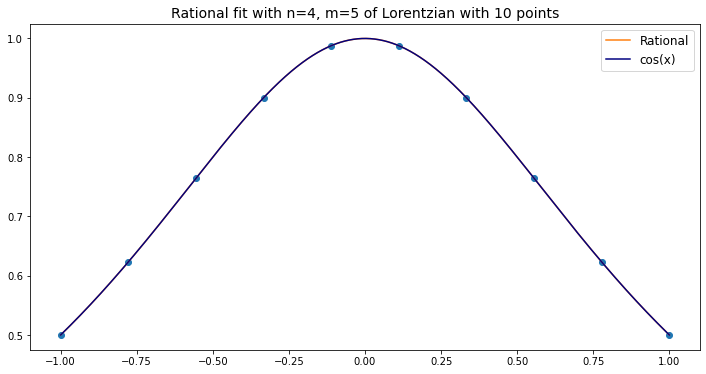

Error in rational fit:  3.737098796860195e-16


In [16]:
#Function
n=4 #numerator & denominator order for rational fit
m=5 

def func(x):
    return 1/(1+x**2)

x = np.linspace(-1,1,n+m+1)
y = func(x)

xx = np.linspace(-1, 1, 1001)

#Rational
pcols=[x**k for k in range(n+1)]
pmat=np.vstack(pcols)

qcols=[-x**k*y for k in range(1,m+1)]
qmat=np.vstack(qcols)
mat=np.hstack([pmat.T,qmat.T])
coeffs=np.linalg.pinv(mat)@y

p=0
for i in range(n+1):
    p=p+coeffs[i]*xx**i
qq=1
for i in range(m):
    qq=qq+coeffs[n+1+i]*xx**(i+1)

y_rat=p/qq


plt.figure(figsize=(12,6))
plt.title('Rational fit with n=4, m=5 of Lorentzian with {} points'.format(n+m+1), fontsize=14)
plt.plot(x,y, 'o')
plt.plot(xx, y_rat, label='Rational')
plt.plot(xx, func(xx), label='cos(x)', color='navy')
plt.legend(fontsize=12)
plt.show()

print('Error in rational fit: ',np.std(y_rat-func(xx)))

When we switch from np.linalg.inv to np.linalg.pinv, even with our numerator and denominator set at 4 & 5 respectively, our rational fit works! This is because when we try to calculate our coefficients, our program will correctly predict that the 3rd, 4th and 5th order terms in our denominator should be equal to 0, since we are fitting to a Lorentzian ($\frac{1}{1+x^{2}}$). These 0 terms in the coefficiennt matrix then cause problems when we take the inverse of said matrix with using np.linalg.inv. Luckily though, we can instead take the "pseudo-inverse" of the matrix by using np.linalg.pinv, which lets us bypass the problems caused by the 0s and therefore giving us a proper rationanl fit.